In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
features_ventana1 = pd.read_csv('../xgb/features_installs_gonzalo_sc_ventana1.csv').set_index('ref_hash')
aux_ventana1 = pd.read_csv('../xgb/features_timediff_installs_ventana1.csv').set_index('ref_hash')
features_ventana1 = features_ventana1.join(aux_ventana1, how = 'outer', lsuffix = '_clicks', rsuffix = '_timediff_installs')
aux_ventana1 = pd.read_csv('../xgb/features_sc_ventana1.csv').set_index('ref_hash')
features_ventana1 = features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_events')
labels_sc_ventana1 = pd.read_csv('../xgb/labels_sc_ventana1.csv').set_index('ref_hash')
ventana1 = features_ventana1.join(labels_sc_ventana1, how = 'left', rsuffix = '_target').fillna(259200)#3 dias pasado a segundos

features_ventana2 = pd.read_csv('../xgb/features_installs_gonzalo_sc_ventana2.csv').set_index('ref_hash')
aux_ventana2 = pd.read_csv('../xgb/features_timediff_installs_ventana2.csv').set_index('ref_hash')
features_ventana2 = features_ventana2.join(aux_ventana2, how = 'outer', lsuffix = '_clicks', rsuffix = '_timediff_installs')
aux_ventana2 = pd.read_csv('../xgb/features_sc_ventana2.csv').set_index('ref_hash')
features_ventana2 = features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_events')
labels_sc_ventana2 = pd.read_csv('../xgb/labels_sc_ventana2.csv').set_index('ref_hash')
ventana2 = features_ventana2.join(labels_sc_ventana2, how = 'left', rsuffix = '_target').fillna(259200)#3 dias pasado a segundos

features_ventana3 = pd.read_csv('../xgb/features_installs_gonzalo_sc_ventana3.csv').set_index('ref_hash')
aux_ventana3 = pd.read_csv('../xgb/features_timediff_installs_ventana3.csv').set_index('ref_hash')
features_ventana3 = features_ventana3.join(aux_ventana3, how = 'outer', lsuffix = '_clicks', rsuffix = '_timediff_installs')
aux_ventana3 = pd.read_csv('../xgb/features_sc_ventana3.csv').set_index('ref_hash')
features_ventana3 = features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_events')
labels_sc_ventana3 = pd.read_csv('../xgb/labels_sc_ventana3.csv').set_index('ref_hash')
ventana3 = features_ventana3.join(labels_sc_ventana3, how = 'left', rsuffix = '_target').fillna(259200)#3 dias pasado a segundos

features_ventana4 = pd.read_csv('../xgb/features_installs_gonzalo_sc_ventana4.csv').set_index('ref_hash')
aux_ventana4 = pd.read_csv('../xgb/features_timediff_installs_ventana4.csv').set_index('ref_hash')
features_ventana4 = features_ventana4.join(aux_ventana4, how = 'outer', lsuffix = '_clicks', rsuffix = '_timediff_installs')
aux_ventana4 = pd.read_csv('../xgb/features_sc_ventana4.csv').set_index('ref_hash')
features_ventana4 = features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_events')
labels_sc_ventana4 = pd.read_csv('../xgb/labels_sc_ventana4.csv').set_index('ref_hash')
ventana4 = features_ventana4.join(labels_sc_ventana4, how = 'left', rsuffix = '_target').fillna(259200)#3 dias pasado a segundos

In [3]:
#matriz = pd.read_csv('../xgb/training_set_sc.csv').set_index('ref_hash')
matriz = ventana1.append(ventana2).append(ventana3).append(ventana4)

In [4]:
features = matriz.iloc[:,:-1]
labels = matriz.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=features,label=labels)

/usr/local/lib/python2.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python2.7/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [5]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.25, random_state=123)

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.055,
                max_depth = 15, alpha = 10, num_boost_round = 50, gamma = 10,
                          n_jobs = 10, n_estimators = 89, nfolds =10 )

In [7]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=10, importance_type='gain',
       learning_rate=0.055, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=89, n_jobs=10,
       nfolds=10, nthread=None, num_boost_round=50, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [8]:
predicted_labels = xg_reg.predict(test_features)

In [9]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE: %f" % (rmse))

RMSE: 25713.570887


## Importancia de los features (cuantas veces aparecen en los árboles)

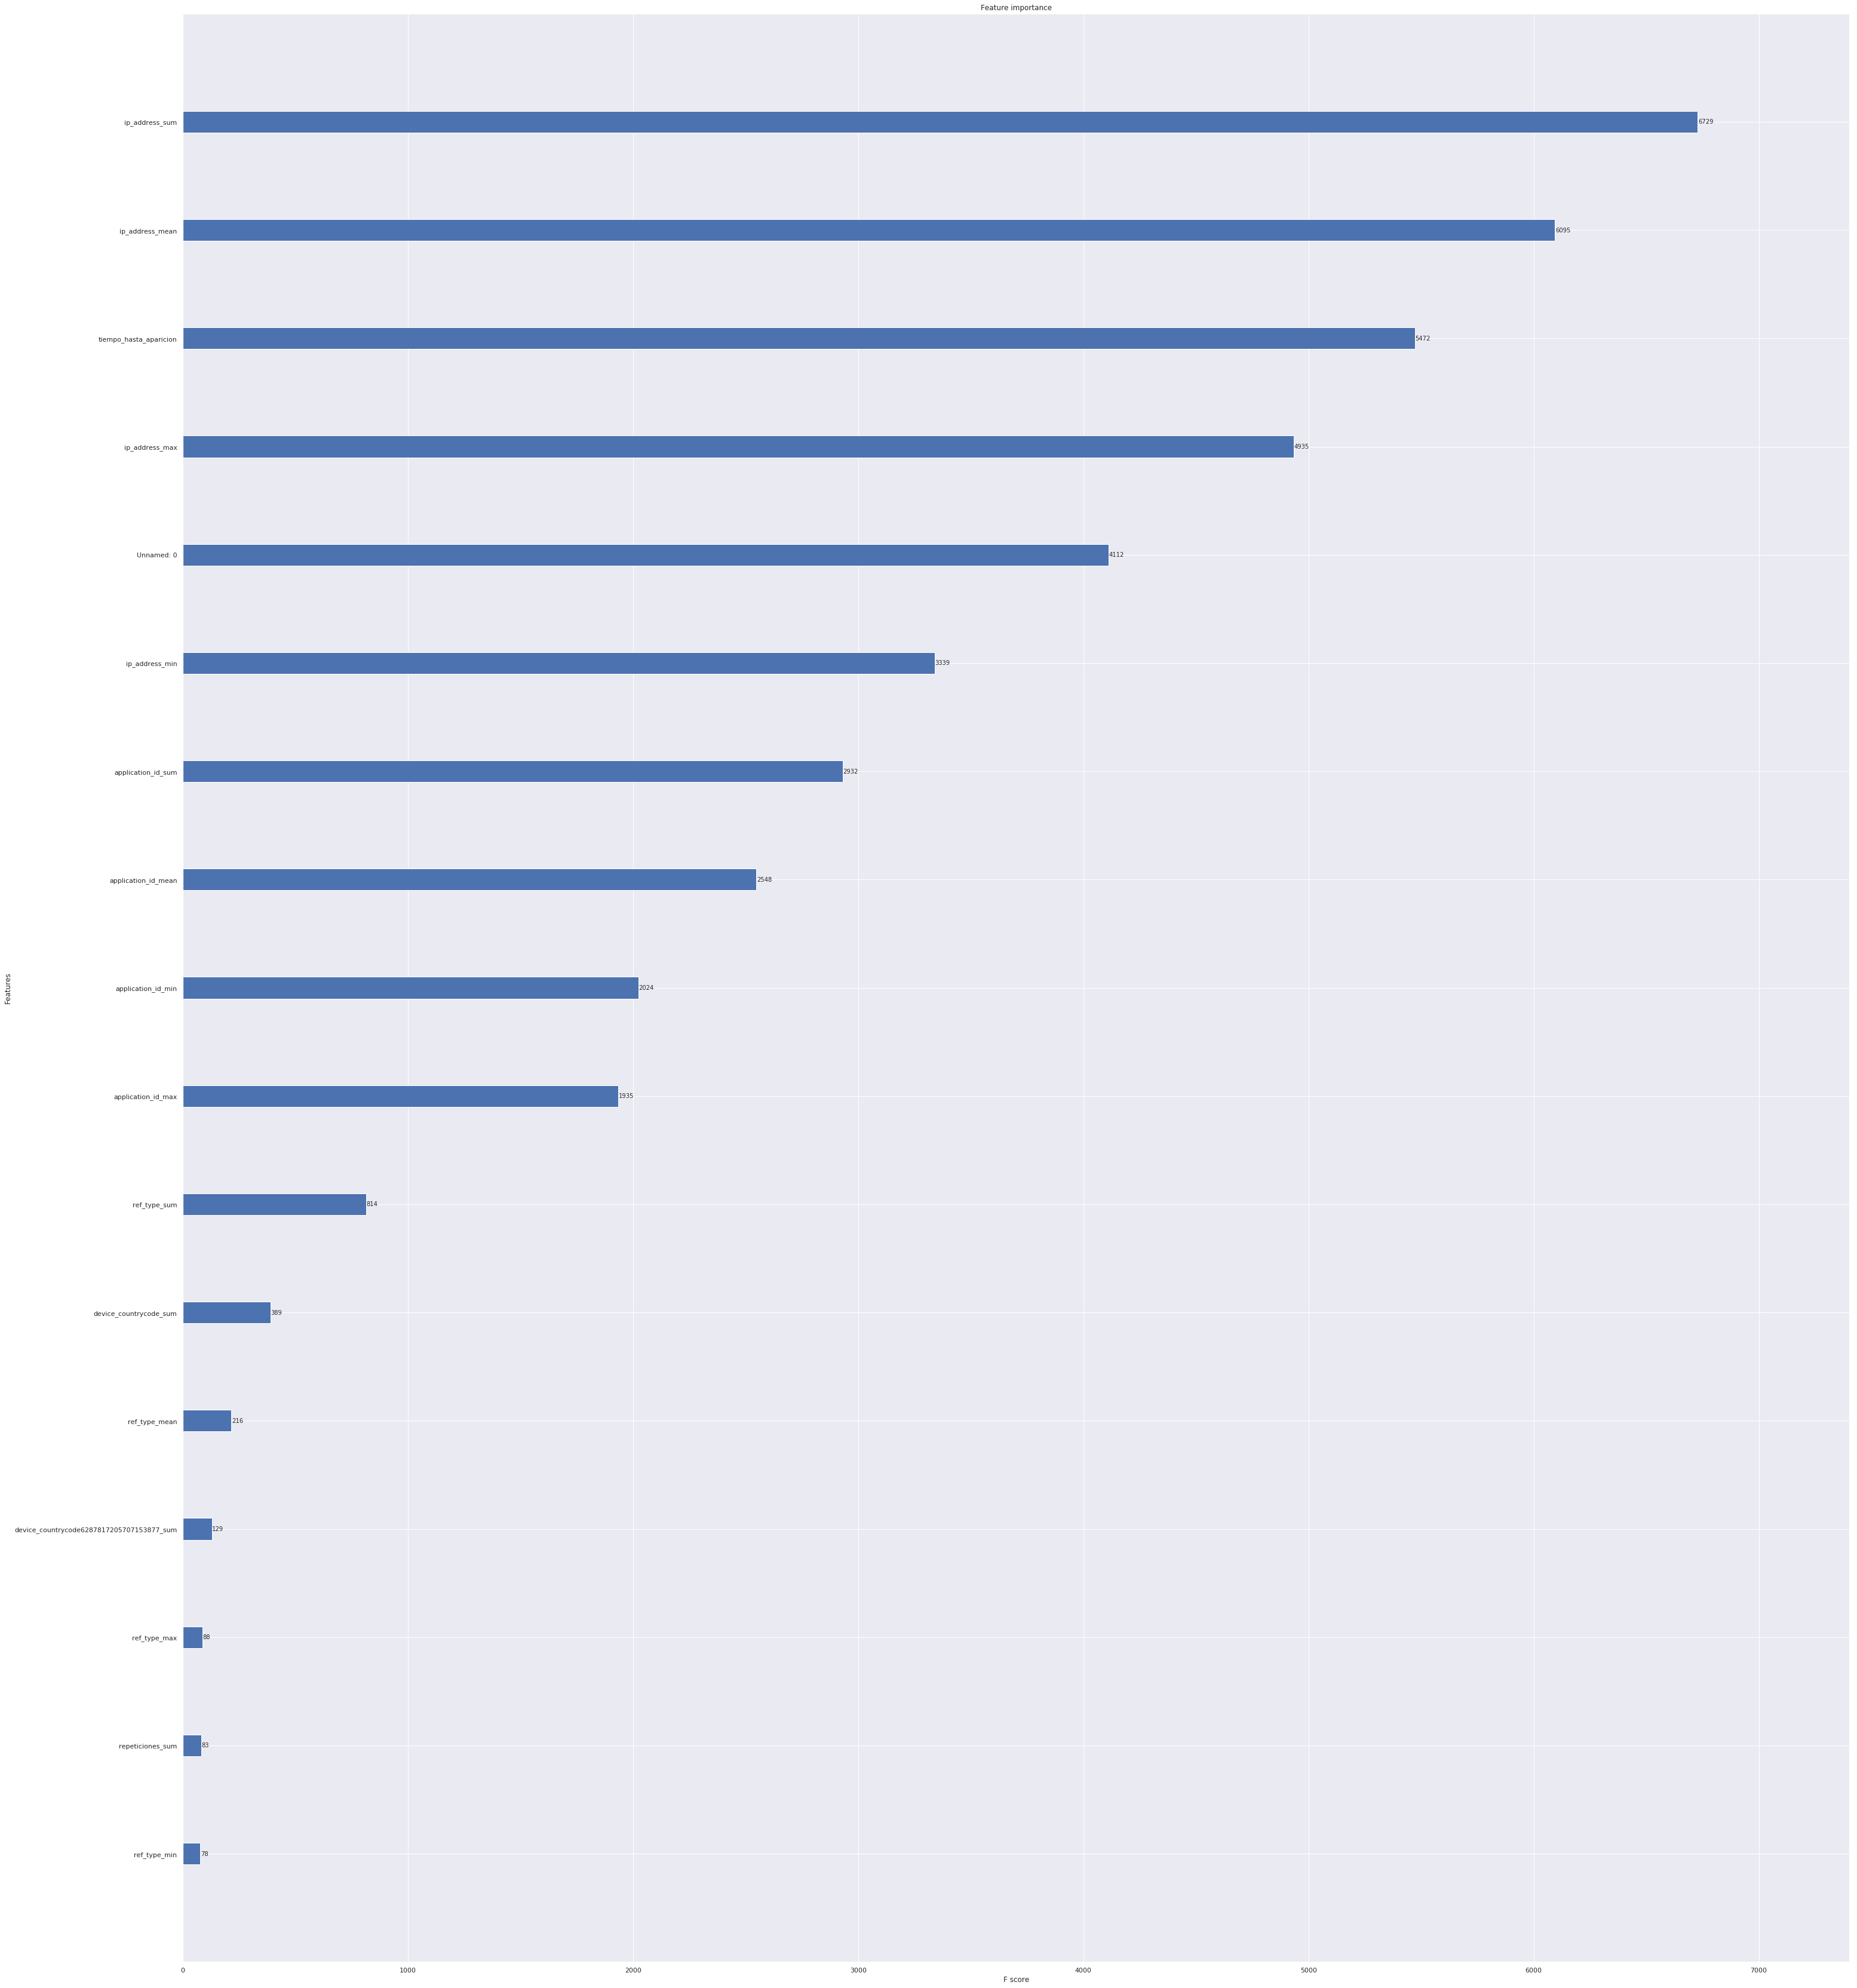

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 60))
xgb.plot_importance(xg_reg, ax=ax)
plt.show()

In [13]:
features_ventana7 = pd.read_csv('../xgb/features_installs_gonzalo_sc_ventana7.csv').set_index('ref_hash')
aux_ventana7 = pd.read_csv('../xgb/features_timediff_installs_ventana7.csv').set_index('ref_hash')
features_ventana7 = features_ventana7.join(aux_ventana7, how = 'outer', lsuffix = '_clicks', rsuffix = '_timediff_installs')
aux_ventana7 = pd.read_csv('../xgb/features_sc_ventana7.csv').set_index('ref_hash')
features_ventana7 = features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_events')

labels_ventana7 = pd.read_csv('../xgb/base_target_sc.csv').set_index('ref_hash')
target = labels_ventana7

ventana7 = features_ventana7.join(labels_ventana7, how = 'right').fillna(0).reset_index().rename(index=str, columns={"device_id": "ref_hash"}) #3 dias pasado a segundos
ventana7 = ventana7.set_index('ref_hash')

features_ventana7 = ventana7.iloc[:,:-1]
labels_ventana7 = ventana7.iloc[:,-1]

In [14]:
predicted_target_labels = xg_reg.predict(features_ventana7)

In [15]:
target = pd.read_csv('../xgb/base_target_sc.csv').set_index('ref_hash')
target['obj'] = predicted_target_labels

In [16]:
target=target.sort_values(by='obj')

In [17]:
target.to_csv('../xgb/target_sc_25k_usando_50features_segun_rf_y_timediff.csv')